# Exercise 1: Linear Regression

## 1. Linear Regression with one variable

### 1.1 Plotting data

In [1218]:
import numpy as np 
import pandas as pd 
import seaborn as sns

import jax.numpy as jnp 
from jax import jit, grad, value_and_grad, vmap

import matplotlib.pyplot as plt 
%matplotlib inline


In [1219]:
# let's open the data 
df = pd.read_csv('../data/ex1data1.txt', sep=',', header=None)
df.columns = ['population', 'profit']


[Text(0.5, 0, 'population of city in 10,0000s'),
 Text(0, 0.5, 'profit in $10,000s'),
 Text(0.5, 1.0, 'scatter plot')]

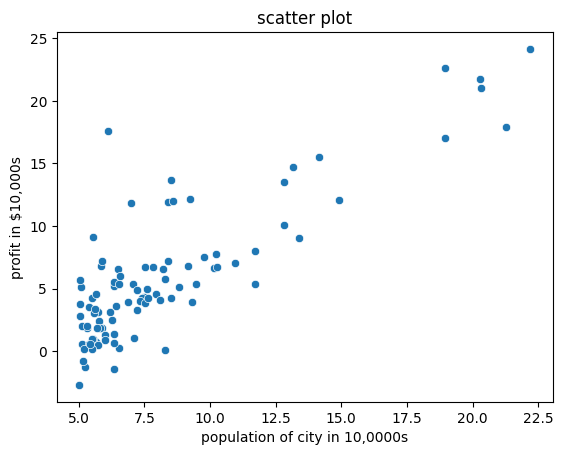

In [1220]:
ax = sns.scatterplot(x='population', y='profit', data=df)
ax.set(xlabel='population of city in 10,0000s', ylabel='profit in $10,000s', title='scatter plot')

### 1.2 Gradient descent 
Fit the linear regression parameters $\theta$ to the dataset using gradient descent 

#### 1.2.1 Update equation 

Linear regression follos the next equation: 

$$ \hat{y}_{\theta}(x) = \theta^{T} x = \theta_0 + \theta_1 x_1 $$

To do the linear regression it is necessary to minimize the cost function RMSE (Root Mean Square Error): 

$$ J(\theta) = \frac{1}{2m} \sum_{i=1}^{m} (\hat{y}_i - y_i)^2 $$

In [1221]:
df.tail()

,population,profit
92,5.8707,7.20290
93,5.3054,1.98690
94,8.2934,0.14454
95,13.3940,9.05510
96,5.4369,0.61705


In [1222]:
# let's define the values 
m = df.shape[0]
X = jnp.hstack((jnp.ones((m,1)),df.population.values.reshape(-1,1)))
y = jnp.array(df.profit.values).reshape(-1,1)
theta = jnp.zeros(shape=(X.shape[1],1))

In [1223]:
X.shape, y.shape, theta.shape, theta

((97, 2),
 (97, 1),
 (2, 1),
 Array([[0.],
        [0.]], dtype=float32))

In [1224]:
@jit 
def cost(theta, X, y):
    m = y.shape[0]
    h = X@theta
    return (1/(2*m)) * jnp.sum((h-y)**2)

grad(cost)(theta,X,y)

Array([[ -5.839135],
       [-65.328835]], dtype=float32)

In [1225]:

J = cost(theta, X, y)
print('With theta = [0 ; 0]\nCost computed =', J)

With theta = [0 ; 0]
Cost computed = 32.07273


In [1226]:
J = cost(jnp.array([[-1],[2]]), X, y)
print('With theta = [-1 ; 2]\nCost computed =', J)

With theta = [-1 ; 2]
Cost computed = 54.242447


In [1227]:
import optax 

lr = 0.01 
optimizer = optax.adam(lr,0.099)
opt_state = optimizer.init(theta)
jit_grad_cost= jit(value_and_grad(cost))


In [1228]:
%time
cost_history = [] 


for train_step in range(1700):
    
    cost,grads = jit_grad_cost(theta,X,y)
    updates, opt_state = optimizer.update(grads,opt_state)
    theta = optax.apply_updates(theta, updates)
    
    cost_history.append(cost)

CPU times: user 7 µs, sys: 1e+03 ns, total: 8 µs
Wall time: 16.5 µs


In [1229]:
print('Theta found by gradient descent:\n', theta)
print('Expected theta values (approx)\n -3.6303\n  1.1664')

Theta found by gradient descent:
 [[-3.6583087]
 [ 1.1687169]]
Expected theta values (approx)
 -3.6303
  1.1664


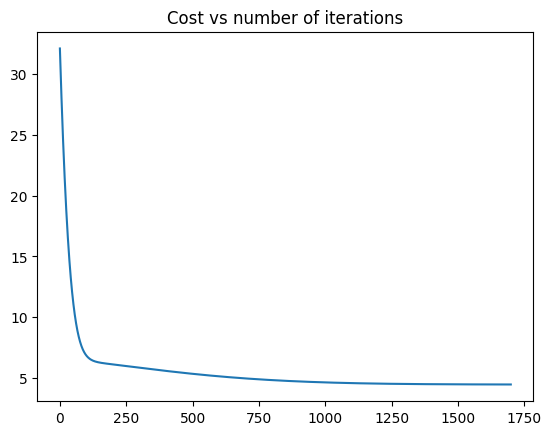

In [1230]:

plt.plot(cost_history)
plt.title("Cost vs number of iterations")
plt.show()

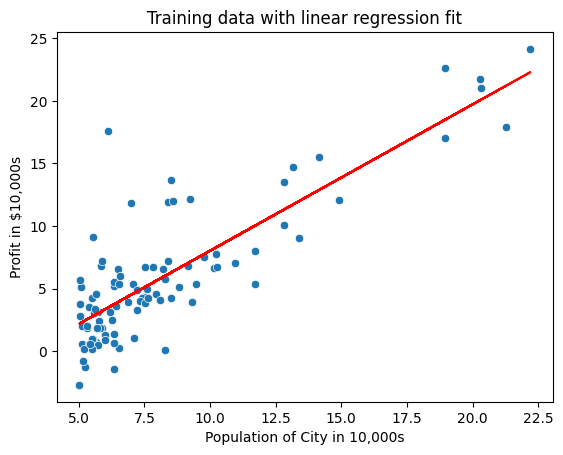

In [1231]:
ax = sns.scatterplot(x='population', y='profit', data=df)
plt.plot(X[:,1], X.dot(theta), color='r')
ax.set(xlabel='Population of City in 10,000s', ylabel='Profit in $10,000s', title='Training data with linear regression fit');


In [1232]:
y_pred = jnp.array([1, 3.5]).dot(theta)
f'For population = 35,000, we predict a profit of {y_pred[0]*10000}'

'For population = 35,000, we predict a profit of 4322.00439453125'

In [1233]:
y_pred = jnp.array([1, 7]).dot(theta)
f'For population = 70,000, we predict a profit of {y_pred[0]*10000}'

'For population = 70,000, we predict a profit of 45227.09765625'

### 1.3 Visualizing $J(\theta)$

In [1234]:
theta0_vals = jnp.linspace(-10, 10, 100)
theta1_vals = jnp.linspace(-1, 4, 100)

In [1235]:
J_vals = jnp.zeros(shape=(len(theta0_vals), len(theta1_vals)))

In [1236]:
def cost(theta, X, y):
    m = y.shape[0]
    h = X@theta
    return (1/(2*m)) * jnp.sum((h-y)**2)


In [1237]:
J_vals = jnp.zeros((len(theta0_vals), len(theta1_vals)))

for i in range(0, len(theta0_vals)):
    for j in range(0, len(theta1_vals)):
        the = jnp.array([[theta0_vals[i]], [theta1_vals[j]]])
        J_vals = J_vals.at[i,j].set(cost(the, X, y))

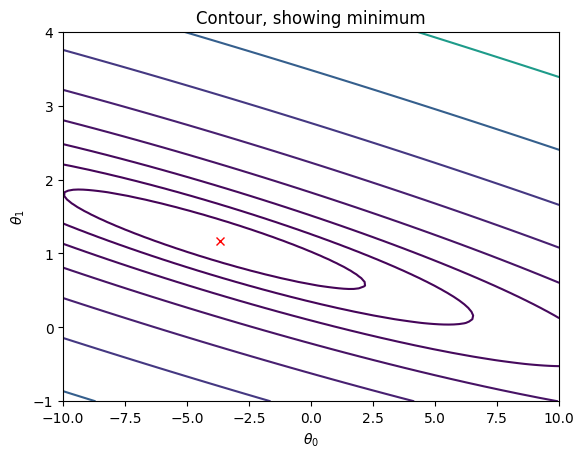

In [1238]:
ax = plt.contour(theta0_vals, theta1_vals, np.transpose(J_vals), levels=np.logspace(-2,3,20))
plt.plot(theta[0,0], theta[1,0], marker='x', color='r');
plt.xlabel(r'$\theta_0$');
plt.ylabel(r'$\theta_1$');
plt.title('Contour, showing minimum');

### 1.4 Equivalent code using Scikit-Learn

In [1239]:
from sklearn.linear_model import LinearRegression 

%time
lin_reg = LinearRegression()
lin_reg.fit(df.population.values.reshape(-1,1),
            df.profit.values.reshape(-1,1))

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 8.34 µs


LinearRegression()

In [1240]:
theta_sklearn = jnp.array([lin_reg.intercept_[0], lin_reg.coef_[0][0]])
theta_sklearn.reshape(-1,1)
theta_sklearn.shape, lin_reg.intercept_[0], lin_reg.coef_[0][0]

((2,), -3.8957808783118484, 1.1930336441895932)

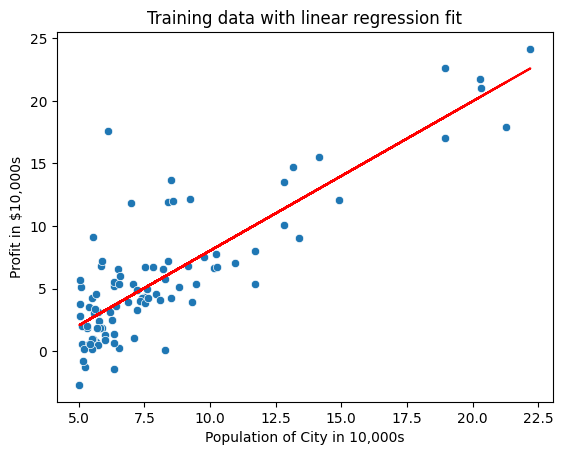

In [1241]:
ax = sns.scatterplot(x='population', y='profit', data=df)
plt.plot(X[:,1], X.dot(theta_sklearn), color='r')
ax.set(xlabel='Population of City in 10,000s', ylabel='Profit in $10,000s', title='Training data with linear regression fit');


## Linear Regression with Multiple Variables

In [1242]:
df2 = pd.read_csv('../data/ex1data2.txt', sep=',', header=None)
df2.columns = ['house_size', 'bedrooms', 'house_price']
df2.describe().T


,count,mean,std,min,25%,50%,75%,max
house_size,47.0,2000.680851,794.702354,852.0,1432.0,1888.0,2269.0,4478.0
bedrooms,47.0,3.170213,0.760982,1.0,3.0,3.0,4.0,5.0
house_price,47.0,340412.659574,125039.899586,169900.0,249900.0,299900.0,384450.0,699900.0


We can speed up gradient descent by having each of our input values in roughly the same range, ideally $-1 \leq x_i \leq1$ or $-0.5 \leq x_i \leq0.5$.

* Feature scaling: involves dividing the input values by the range (i.e. the maximum value minus the minimum value) of the input variable
* Mean normalization: involves subtracting the average value for an input variable from the values for that input variable

$x_i := \frac{x_i - \mu_i}{s_i}$, wher $\mu_i$ is the average of all the values for features (i) and $s_i$ is the range of values (max-min), the standard deviation.

In [1243]:
def normalize_fea(x, mean=np.zeros(1), std=np.zeros(1)):
    x = np.array(x)
    if len(mean.shape) == 1 or len(std.shape) == 1: 
        mean = np.mean(x, axis=0)
        std = np.std(x, axis=0, ddof=1)
    x = (x - mean)/std 
    return x, mean, std 

In [1244]:
X_norm, mu, sigma = normalize_fea(df2[['house_size', 'bedrooms']])

In [1245]:
df2['house_size_normalized'] = X_norm[:,0]
df2['bedrooms_normalized'] = X_norm[:,1]
df2[['house_size_normalized', 'bedrooms_normalized']].describe().T

,count,mean,std,min,25%,50%,75%,max
house_size_normalized,47.0,3.779483e-17,1.0,-1.445423,-0.715590,-0.141790,0.337635,3.117292
bedrooms_normalized,47.0,2.746030e-16,1.0,-2.851859,-0.223675,-0.223675,1.090417,2.404508


#### 2.2 Gradient Descent 

The cost function will be 
$$ J(\theta) = \frac{1}{2m} (X\theta - y)^T (X\theta - y) $$

In [1246]:
@jit
def cost_mul(theta, X,y):
    m = y.shape[0]
    h = X@theta 
    mul = h-y
    J = (1/(2*m)) * mul.T@mul
    return J[0][0]


In [1247]:
m = df2.shape[0]
X = jnp.hstack((np.ones((m,1)),X_norm))
y = jnp.array(df2.house_price.values).reshape(-1,1)
theta = jnp.zeros(shape=(X.shape[1],1))
cost_mul(theta,X,y)

Array(6.5591554e+10, dtype=float32)

In [1248]:
lr = 0.1
optimizer = optax.sgd(lr)
opt_state = optimizer.init(theta)
jit_grad_cost= jit(value_and_grad(cost_mul, argnums=0))

In [1249]:
cost_history: list[float] = []

for train_step in range(500):
    
    cost,grads = jit_grad_cost(theta,X,y)
    updates, opt_state = optimizer.update(grads,opt_state)
    theta = optax.apply_updates(theta, updates)
    # print(grads, ' ; ',updates, ' ; ', theta)
    
    cost_history.append(cost)

In [1250]:
theta

Array([[340412.53  ],
       [110631.    ],
       [ -6649.4453]], dtype=float32)

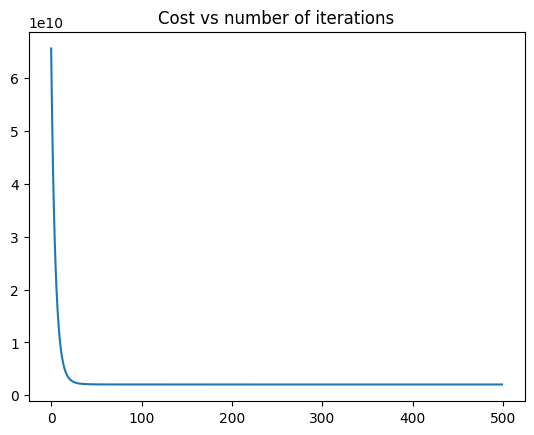

In [1251]:
plt.plot(cost_history)
plt.title("Cost vs number of iterations")
plt.show()

In [1252]:
cost_history[-1]

Array(2.0432799e+09, dtype=float32)

In [1253]:
y_pred = theta[0] + theta[1]*1650 + theta[2]*3
f'Price of a house with 1650 square feet and 3 bedrooms: {y_pred[0]}$'


'Price of a house with 1650 square feet and 3 bedrooms: 182861616.0$'

### 2.3 Normal equation

A closed-form solution to find $\theta$ without iteration

$$ \theta = (X^T X)^{-1} X^T y 

In [1254]:
def normal_eqn(X, y):
    inv = np.linalg.pinv(X.T.dot(X))
    theta = inv.dot(X.T).dot(y)
    return theta

In [1255]:

Xe = np.hstack((np.ones((m,1)),df2[['house_size', 'bedrooms']].values))
theta_e = normal_eqn(Xe, y)
theta_e

array([[89597.90954355],
       [  139.21067402],
       [-8738.01911255]])

In [1256]:
y_pred = theta_e[0] + theta_e[1]*1650 + theta_e[2]*3
f'Price of a house with 1650 square feet and 3 bedrooms: {y_pred[0]}$'

'Price of a house with 1650 square feet and 3 bedrooms: 293081.4643349715$'

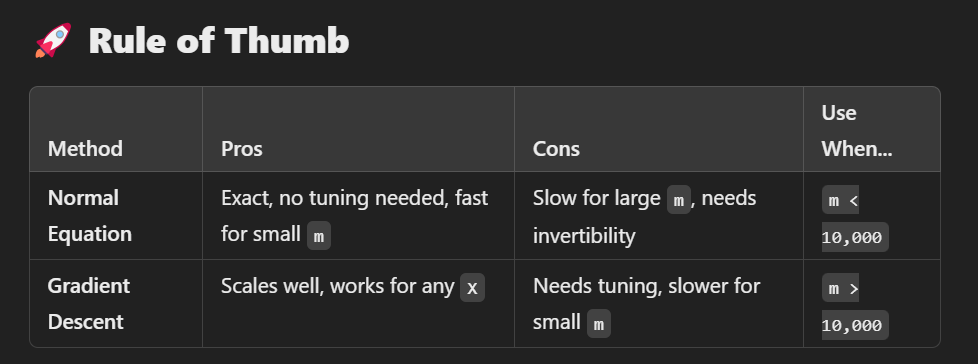

### 2.4 Equivalent Code using Scikit-Learn

In [1257]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_norm,y)

LinearRegression()

In [1258]:
lin_reg.intercept_, lin_reg.coef_

(array([340412.65957447]), array([[110631.05027885,  -6649.47427082]]))